In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Gaussian swirls (originally brainstorming novel TSP approximations geometrically)

# Note: this took a *completely* different turn and became about pattern generation and not really TSP approximations

Trying to reduce the dimensionality of a TSP problem to a sort of "rook's tour", or eulerian tour on lattice

Start with putting points on (x,y) hyperplane according to city locations, then increase temperature of system so that points only move in z direction.  Then try to find eigenvector that corresponds to rook's tour and see if this is a solution
- Does the type of random walk matter?  Why should I try a particle system in heat bath over other random walks?

Another method/detour:  With same hyperplane, look at hyperplane from the side s.t. points line up linearly.  How many different ways can points be arranged linearly, and does this narrow down solutions maybe? 
- This actually does not work at all (counter example: cities distributed in a circle)
- How does distribution of cities (e.g. gaussian disc) affect TSP problem?
    - What if there are multiple clusters?  Should the problem be broken up into subsets by city cluster first?
- Detouring from TSP entirely: what does the amount of ways points can be rearranged say about a random set of points? Can it ever approach n! ? If not, what fraction of n! is it? 
- does size of point matter (affects overlap)?
- Time intervals b/w crossings ('spikes'): do they matter?
- If cyclic colors (|colors| < |points|), do any patterns repeat?
- When do more than one point cross each other?
- How does radius, covariance of points affect the types and number of arrangments?

- interpretation of points that line up ("covering" each other)

In [226]:
centroid = lambda x,y: (sum(x)/len(x),sum(y)/len(x))

def rotate(point,center,theta):
    """x_only returns only x coordinate"""
    x,y = point[0],point[1]
    sin,cos = np.sin(theta), np.cos(theta)
    
    #translation
    x -= center[0]
    y -= center[1]
    
    #rotate point
    x_new = x*cos - y*sin
    y_new = x*sin + y*cos #cool stuff happens if you do subtraction instead
    
    # translate point back
    x = x_new + center[0]
    y = y_new + center[1]
    
    return (x,y)
    
    
def roto360(x,y,step=0.01):
    """records new order of points if x pos changes
    Each point has its own index in dict"""
    coords = dict.fromkeys(list(range(len(x)))) #coordinate system at theta = 0, this stays constant
    center = centroid (x,y) #centroid of point cluster; might want to play around with different types of centers
    
    for i in range(len(x)):
        coords[i] = (x[i],y[i])
    
    positions = {k: v[1] for k, v in coords.items()} #contains x coordinates, updates new x upon rotation 
    
    arg1 = []
    inv_pos0 = {v[0]: k for k, v in coords.items()}
    for x in sorted(inv_pos0.keys()):
        arg1.append(inv_pos0[x])
    
    arrangements = [arg1] #initialize with first orders; appends new ordered positions if orders change upon rotation
    angles = np.arange(0,2*np.pi,step)
    for n_i, theta in enumerate(angles):
        prev_arg = arrangements[-1]
        curr_arg = []
        for point in positions.keys(): #point is point's static index (e.g., 0)
            xy = coords[point]
            positions[point] = rotate(xy,center,theta)[0] #grab new x coord
        inv_pos = {v: k for k, v in positions.items()}
        for x in sorted(inv_pos.keys()):
            curr_arg.append(inv_pos[x]) #appending point indices, ordered
        
        if prev_arg != curr_arg:
            arrangements.append(curr_arg)
    
    return arrangements

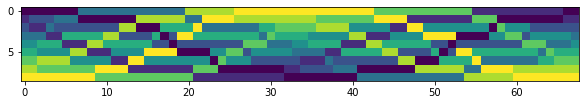

In [281]:
arrangements = roto360(xt,yt)
plt.figure(figsize=(10,10))
plt.imshow(np.array(arrangements).T)

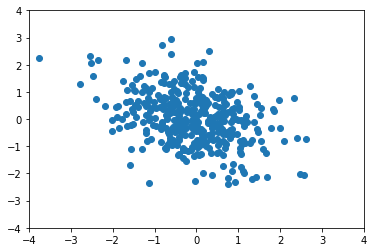

In [308]:
cov = [[1,-0.4],
       [-0.4,1]]
disc = np.random.multivariate_normal([0,0],cov,size=400)
plt.xlim((-4,4)); plt.ylim((-4,4))
plt.scatter(disc[:,0], disc[:,1])
a2 = roto360(disc[:,0], disc[:,1],step= .01)

(-0.5, 628.5, 399.5, -0.5)

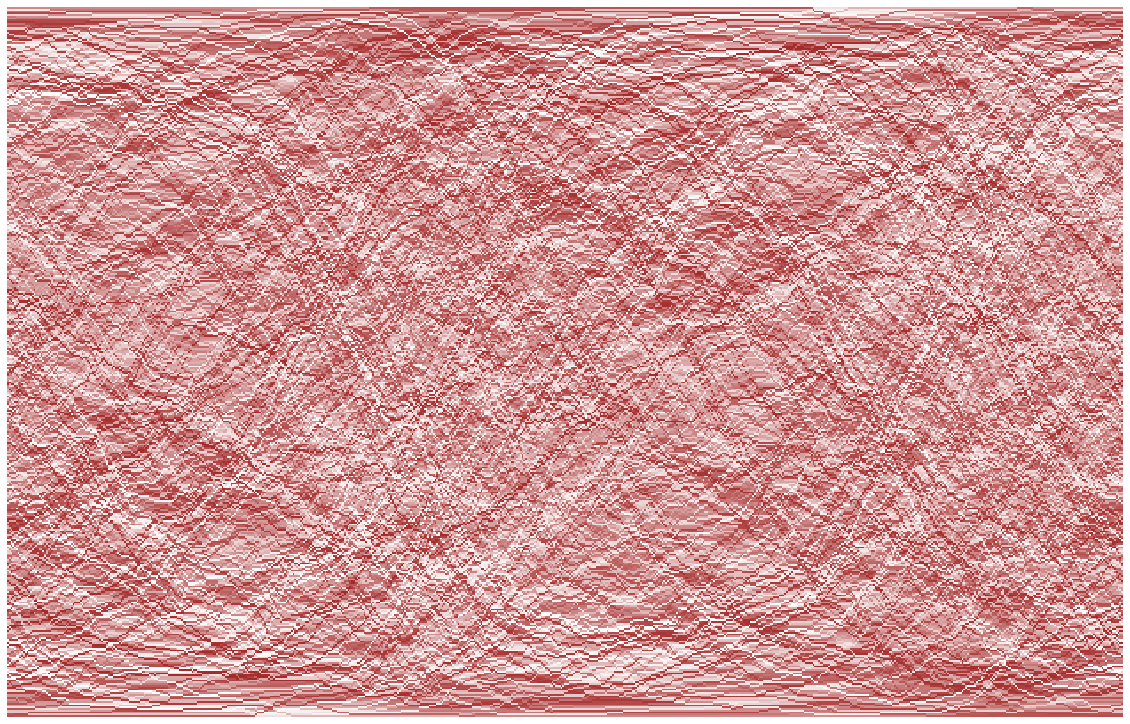

In [309]:
plt.figure(figsize = (20,20))
cm = LinearSegmentedColormap.from_list('mycmap', ['white', 'brown'])
plt.imshow(np.array(a2).T, cmap = cm)
plt.axis('off')

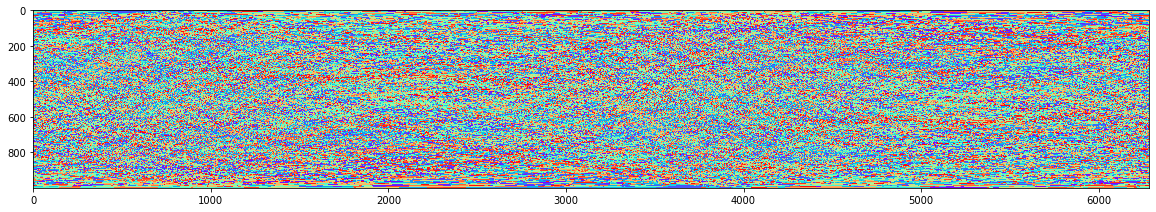

In [279]:
plt.figure(figsize = (20,20))
plt.imshow(np.array(a2).T, cmap = plt.cm.rainbow)
plt.

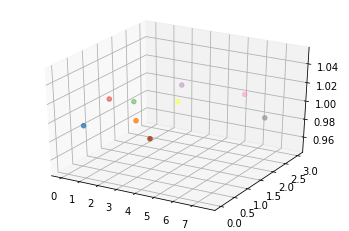

In [4]:
#a random city problem
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xt = [0  ,1,1.2,1.9,2.7,3,4.5,5.2,7.6] #"random" points
yt = [1.5,0,1.6,2.9,0.7,2,  0,  3,  2]
z = [np.ones(9)]
colors = list(iter(plt.cm.Set1(np.linspace(0, 1, 9))))
ax.scatter(xt,yt,z, color=colors)

plt.show()